LOG p

In [ ]:
import pandas as pd

# Load the CSV file into a DataFrame
df1 = pd.read_csv('/content/1 Epoch LogPTestCaseNew.csv')

# Display the first few rows of the DataFrame
print(df.head())

import pandas as pd

# Load the CSV file into a DataFrame
df2 = pd.read_csv('/content/3 Epoch LogPTestCase (2).csv')

# Display the first few rows of the DataFrame
print(df.head())

# Load the CSV file into a DataFrame
df3 = pd.read_csv('/content/6 Epoch LogPTestCase.csv')

# Display the first few rows of the DataFrame
print(df.head())

   compound_id                                             smiles generation  \
0           44  COc1ccc(-n2c(SCC(=O)Nc3cccc4ccccc34)nnc2-c2ccn...     [0, 1]   
1            7                    CCN(CC)C(=O)NCc1ccc(COC(C)C)cc1     [0, 1]   
2           17  CCN(CC)S(=O)(=O)c1ccc(C(C)NC(=O)c2ccc(C)c(C)c2...     [0, 1]   
3           26       O=C(c1cc2cccc(Cl)c2o1)N1CCC(C(O)c2ccccc2)CC1     [0, 1]   
4           24         CCCCN(C)C(=O)C1CCN(C(=O)Nc2cc(OC)ccc2F)CC1     [0, 1]   

                                          chromosome   fitness  parent1_id  \
0  [ 0.63300824  0.40066475  2.2317414   1.662423...  3.450441         NaN   
1  [ 0.0323195   0.46094438 -1.5992203  -2.999050...  1.835070         NaN   
2  [ 4.00463402e-01  6.36082053e-01 -1.01430488e+...  1.887532         NaN   
3  [ 0.344708   -0.42891777  0.11022831  1.969898...  2.222694         NaN   
4  [ 0.8245235   0.99894094 -0.63629764  0.323096...  1.801635         NaN   

   parent2_id  
0         NaN  
1         NaN  
2 

In [ ]:
df1.columns

Index(['compound_id', 'smiles', 'generation', 'chromosome', 'fitness',
       'parent1_id', 'parent2_id'],
      dtype='object')

In [ ]:
df1['generation'].value_counts()

generation
[0, 1]    35
[1]       35
Name: count, dtype: int64

In [ ]:
df2['generation'].value_counts()

generation
[0, 1, 2, 3]    72
[1, 2, 3]       45
[2, 3]          38
[3]             35
[2]             16
[1]             14
[1, 2]          12
[0, 1, 2]        8
[0, 1]           7
Name: count, dtype: int64

In [ ]:
df3['generation'].value_counts()

generation
[1, 2, 3, 4, 5]       75
[0, 1, 2, 3, 4, 5]    65
[2, 3, 4, 5]          44
[3, 4, 5]             42
[5]                   35
[4, 5]                34
[0, 1, 2, 3, 4]       24
[3]                   18
[4]                   18
[2]                   18
[1]                   14
[0, 1, 2, 3]          12
[0, 1, 2]             10
[2, 3]                 8
[0, 1]                 7
[2, 3, 4]              6
[1, 2]                 6
[3, 4]                 6
[1, 2, 3]              6
[1, 2, 3, 4]           4
Name: count, dtype: int64

In [ ]:
df1['parent2_id'].value_counts()

parent2_id
19.0    3
7.0     3
22.0    2
6.0     2
26.0    2
16.0    2
34.0    2
9.0     2
1.0     2
4.0     2
32.0    1
46.0    1
24.0    1
41.0    1
12.0    1
11.0    1
44.0    1
37.0    1
10.0    1
48.0    1
15.0    1
47.0    1
14.0    1
Name: count, dtype: int64

In [ ]:
df2['parent2_id'].value_counts()

parent2_id
7.0      7
5.0      5
41.0     4
18.0     4
78.0     4
30.0     4
40.0     4
88.0     4
4.0      3
77.0     3
44.0     3
13.0     3
85.0     3
43.0     3
103.0    2
69.0     2
72.0     2
56.0     2
84.0     2
27.0     2
33.0     2
90.0     2
47.0     2
32.0     2
45.0     2
49.0     2
10.0     2
89.0     2
22.0     1
8.0      1
9.0      1
20.0     1
53.0     1
105.0    1
80.0     1
58.0     1
52.0     1
64.0     1
62.0     1
34.0     1
16.0     1
6.0      1
79.0     1
70.0     1
38.0     1
48.0     1
26.0     1
46.0     1
3.0      1
42.0     1
108.0    1
Name: count, dtype: int64

In [ ]:
df3['parent2_id'].value_counts()

parent2_id
81.0     6
1.0      6
3.0      6
6.0      6
54.0     5
        ..
84.0     1
105.0    1
47.0     1
106.0    1
166.0    1
Name: count, Length: 73, dtype: int64

In [ ]:
# Define the conditions for categorization
conditions = [
    (df1['fitness'] > 3),        # Lipophilic
    (df1['fitness'] >= 0) & (df1['fitness'] <= 3),  # Balanced
    (df1['fitness'] < 0)         # Hydrophilic
]

# Corresponding labels for each condition
labels = ['Lipophilic', 'Balanced', 'Hydrophilic']

# Apply the conditions and labels
df1['category'] = np.select(conditions, labels, default='Unknown')

# Count the occurrences of each category
category_counts = df1['category'].value_counts()

# Print the counts
print(category_counts)

per_counts = df1['category'].value_counts(normalize=True) * 100
print(per_counts)

category
Balanced       38
Hydrophilic    29
Lipophilic      3
Name: count, dtype: int64
category
Balanced       54.285714
Hydrophilic    41.428571
Lipophilic      4.285714
Name: proportion, dtype: float64


In [ ]:
# Define the conditions for categorization
conditions = [
    (df2['fitness'] > 3),        # Lipophilic
    (df2['fitness'] >= 0) & (df2['fitness'] <= 3),  # Balanced
    (df2['fitness'] < 0)         # Hydrophilic
]

# Corresponding labels for each condition
labels = ['Lipophilic', 'Balanced', 'Hydrophilic']

# Apply the conditions and labels
df2['category'] = np.select(conditions, labels, default='Unknown')

# Count the occurrences of each category
category_counts = df2['category'].value_counts()


# Print the counts
print(category_counts)
per_counts = df2['category'].value_counts(normalize=True) * 100

print(per_counts)

category
Balanced       149
Hydrophilic     97
Lipophilic       1
Name: count, dtype: int64
category
Balanced       60.323887
Hydrophilic    39.271255
Lipophilic      0.404858
Name: proportion, dtype: float64


In [ ]:
# Define the conditions for categorization
conditions = [
    (df3['fitness'] > 3),        # Lipophilic
    (df3['fitness'] >= 0) & (df3['fitness'] <= 3),  # Balanced
    (df3['fitness'] < 0)         # Hydrophilic
]

# Corresponding labels for each condition
labels = ['Lipophilic', 'Balanced', 'Hydrophilic']

# Apply the conditions and labels
df3['category'] = np.select(conditions, labels, default='Unknown')

# Count the occurrences of each category
category_counts = df3['category'].value_counts()

# Print the counts
print(category_counts)

per_counts = df3['category'].value_counts(normalize=True) * 100
print(per_counts)

category
Balanced       265
Hydrophilic    184
Lipophilic       3
Name: count, dtype: int64
category
Balanced       58.628319
Hydrophilic    40.707965
Lipophilic      0.663717
Name: proportion, dtype: float64


AUTOGROW4

Inital model

In [ ]:
import pandas as pd

# Load the CSV file into a DataFrame
df1 = pd.read_csv('/content/Epoch 1 AutoGrow.csv')

# Display the first few rows of the DataFrame
print(df1.head())

import pandas as pd

# Load the CSV file into a DataFrame
df2 = pd.read_csv('/content/Epoch 3 AutoGrow.csv')

# Display the first few rows of the DataFrame
print(df2.head())

# Load the CSV file into a DataFrame
df3 = pd.read_csv('/content/Epoch 5 AutoGrow.csv')

# Display the first few rows of the DataFrame
print(df3.head())

                                              smiles  parent1_id  reaction_id  \
0  COC(=O)[C@H](NC(=S)N(C(=O)CN(c1ccccc1C)S(=O)(=...        41.0         32.0   
1  CC[C@H](O)[C@@H](C)C(=O)N(C(=O)NCC(=O)NCc1cccc...        48.0         23.0   
2  CCOc1ccc(NC(=O)CSc2nnc(-c3ccc(NCc4nnnn4C)cc3)o...        49.0         87.0   
3  COCC(=O)N(C(=O)[C@]1(C)Sc2ccccc2NC1=O)c1c(C(=O...        30.0         26.0   
4  COc1cc(C=C2C(=O)N(C(=O)[C@H]3CNC[C@H]3C)C(=O)N...        20.0         13.0   

            zinc_id    source generation  parent2_id  compound_id   fitness  
0  ZINC000004268893  mutation        [1]         NaN         50.0  0.150641  
1  ZINC000014491092  mutation        [1]         NaN         51.0 -1.490404  
2  ZINC000034155589  mutation        [1]         NaN         52.0 -0.395001  
3  ZINC000100004193  mutation        [1]         NaN         53.0  0.254540  
4  ZINC000004202764  mutation        [1]         NaN         54.0 -1.003316  
                                             

In [ ]:
# Add a new column 'Epoch' to each DataFrame
df1['Epoch'] = 'Epoch 1'
df2['Epoch'] = 'Epoch 3'
df3['Epoch'] = 'Epoch 5'

# Concatenate the DataFrames into a single DataFrame
df_combined = pd.concat([df1, df2, df3], ignore_index=True)

# Display the first few rows of the combined DataFrame to verify
print(df_combined.head())

                                              smiles  parent1_id  reaction_id  \
0  COC(=O)[C@H](NC(=S)N(C(=O)CN(c1ccccc1C)S(=O)(=...        41.0         32.0   
1  CC[C@H](O)[C@@H](C)C(=O)N(C(=O)NCC(=O)NCc1cccc...        48.0         23.0   
2  CCOc1ccc(NC(=O)CSc2nnc(-c3ccc(NCc4nnnn4C)cc3)o...        49.0         87.0   
3  COCC(=O)N(C(=O)[C@]1(C)Sc2ccccc2NC1=O)c1c(C(=O...        30.0         26.0   
4  COc1cc(C=C2C(=O)N(C(=O)[C@H]3CNC[C@H]3C)C(=O)N...        20.0         13.0   

            zinc_id    source generation  parent2_id  compound_id   fitness  \
0  ZINC000004268893  mutation        [1]         NaN         50.0  0.150641   
1  ZINC000014491092  mutation        [1]         NaN         51.0 -1.490404   
2  ZINC000034155589  mutation        [1]         NaN         52.0 -0.395001   
3  ZINC000100004193  mutation        [1]         NaN         53.0  0.254540   
4  ZINC000004202764  mutation        [1]         NaN         54.0 -1.003316   

     Epoch  
0  Epoch 1  
1  Epoch 1  

In [ ]:
df_combined

In [ ]:
df1.columns

Index(['smiles', 'parent1_id', 'reaction_id', 'zinc_id', 'source',
       'generation', 'parent2_id', 'compound_id', 'fitness'],
      dtype='object')

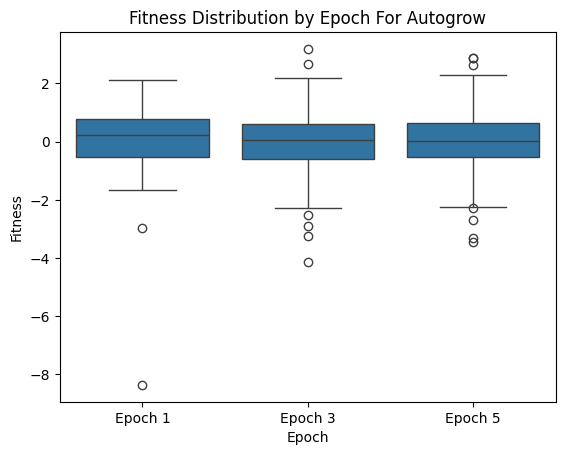

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_combined is already loaded and contains 'fitness' and 'Epoch' columns
# Create a boxplot to visualize the distribution of 'fitness' across different 'Epochs'
sns.boxplot(x='Epoch', y='fitness', data=df_combined)
plt.title('Fitness Distribution by Epoch For Autogrow')
plt.xlabel('Epoch')
plt.ylabel('Fitness')
plt.show()


In [ ]:
df1['generation'].value_counts()

generation
[1]       40
[0, 1]    10
Name: count, dtype: int64

In [ ]:
df2['generation'].value_counts()

generation
[3]             40
[1]             35
[2]             34
[2, 3]          12
[1, 2, 3]        9
[0, 1, 2]        8
[0, 1]           5
[1, 2]           4
[0, 1, 2, 3]     3
Name: count, dtype: int64

In [ ]:
df3['generation'].value_counts()

generation
[5]                40
[3]                34
[2]                33
[1]                32
[4]                32
[4, 5]             16
[2, 3]             12
[1, 2]             10
[3, 4]             10
[1, 2, 3, 4]        8
[0, 1]              8
[1, 2, 3, 4, 5]     5
[0, 1, 2]           4
[2, 3, 4]           3
[3, 4, 5]           3
Name: count, dtype: int64

In [ ]:
 df1['source'].value_counts()

source
mutation     20
crossover    20
initial      10
Name: count, dtype: int64

In [ ]:
 df2['source'].value_counts()

source
mutation     67
crossover    67
initial      16
Name: count, dtype: int64

In [ ]:
 df3['source'].value_counts()

source
crossover    124
mutation     114
initial       12
Name: count, dtype: int64

In [ ]:
import numpy as np
import pandas as pd

# Define the conditions for categorization
conditions = [
    (df1['fitness'] > 3),        # Lipophilic
    (df1['fitness'] >= 0) & (df1['fitness'] <= 3),  # Balanced
    (df1['fitness'] < 0)         # Hydrophilic
]

# Corresponding labels for each condition
labels = ['Lipophilic', 'Balanced', 'Hydrophilic']

# Apply the conditions and labels
df1['category'] = np.select(conditions, labels, default='Unknown')

# Count the occurrences of each category
category_counts = df1['category'].value_counts()

# Print the counts
print(category_counts)

per_counts = df1['category'].value_counts(normalize=True) * 100
print(per_counts)

category
Balanced       33
Hydrophilic    17
Name: count, dtype: int64
category
Balanced       66.0
Hydrophilic    34.0
Name: proportion, dtype: float64


In [ ]:
# Define the conditions for categorization
conditions = [
    (df2['fitness'] > 3),        # Lipophilic
    (df2['fitness'] >= 0) & (df2['fitness'] <= 3),  # Balanced
    (df2['fitness'] < 0)         # Hydrophilic
]

# Corresponding labels for each condition
labels = ['Lipophilic', 'Balanced', 'Hydrophilic']

# Apply the conditions and labels
df2['category'] = np.select(conditions, labels, default='Unknown')

# Count the occurrences of each category
category_counts = df2['category'].value_counts()

# Print the counts
print(category_counts)

per_counts = df1['category'].value_counts(normalize=True) * 100
print(per_counts)

category
Balanced       78
Hydrophilic    71
Lipophilic      1
Name: count, dtype: int64
category
Balanced       52.000000
Hydrophilic    47.333333
Lipophilic      0.666667
Name: proportion, dtype: float64


In [ ]:
# Define the conditions for categorization
conditions = [
    (df3['fitness'] > 3),        # Lipophilic
    (df3['fitness'] >= 0) & (df3['fitness'] <= 3),  # Balanced
    (df3['fitness'] < 0)         # Hydrophilic
]

# Corresponding labels for each condition
labels = ['Lipophilic', 'Balanced', 'Hydrophilic']

# Apply the conditions and labels
df3['category'] = np.select(conditions, labels, default='Unknown')

# Count the occurrences of each category
category_counts = df3['category'].value_counts()

# Print the counts
print(category_counts)

per_counts = df3['category'].value_counts(normalize=True) * 100
print(per_counts)

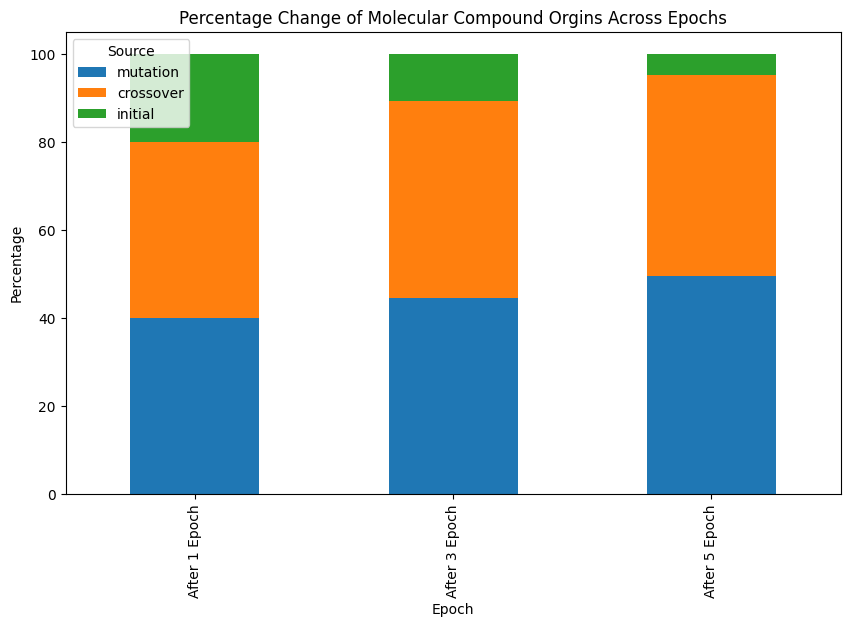

In [ ]:
# Combine the data into a single DataFrame and normalize it to percentages
df_combined = pd.concat([df_epoch_1, df_epoch_2, df_epoch_3], axis=1)
df_combined.columns = ['source_1', 'count_1', 'source_2', 'count_2', 'source_3', 'count_3']

# Calculate percentages
df_combined['percent_1'] = df_combined['count_1'] / df_combined['count_1'].sum() * 100
df_combined['percent_2'] = df_combined['count_2'] / df_combined['count_2'].sum() * 100
df_combined['percent_3'] = df_combined['count_3'] / df_combined['count_3'].sum() * 100

# Prepare data for plotting
percentages = df_combined[['percent_1', 'percent_2', 'percent_3']].T
percentages.columns = df_combined['source_1']
percentages.index = ['After 1 Epoch', 'After 3 Epoch', 'After 5 Epoch']

# Plotting the stacked bar chart
percentages.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Percentage Change of Molecular Compound Orgins Across Epochs')
plt.ylabel('Percentage')
plt.xlabel('Epoch')
plt.legend(title='Source')
plt.show()


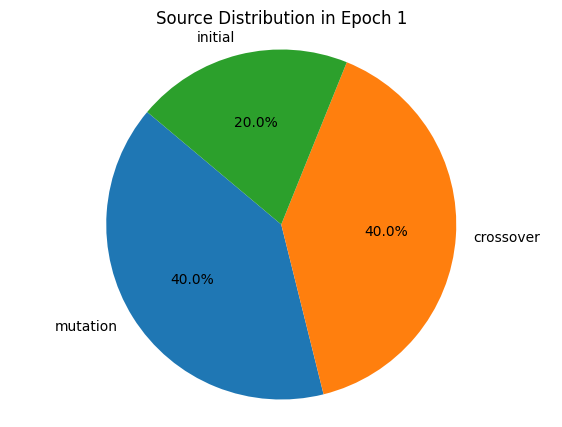

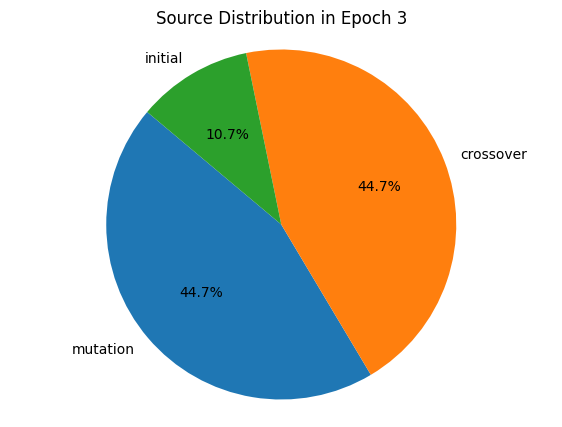

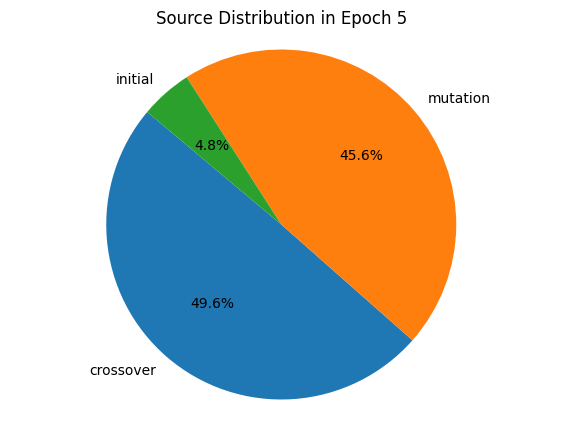

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Data for each epoch
data_epoch_1 = {'mutation': 20, 'crossover': 20, 'initial': 10}
data_epoch_2 = {'mutation': 67, 'crossover': 67, 'initial': 16}
data_epoch_3 = {'crossover': 124, 'mutation': 114, 'initial': 12}

# Creating DataFrames
df_epoch_1 = pd.Series(data_epoch_1).reset_index(name='count').rename(columns={'index': 'source'})
df_epoch_2 = pd.Series(data_epoch_2).reset_index(name='count').rename(columns={'index': 'source'})
df_epoch_3 = pd.Series(data_epoch_3).reset_index(name='count').rename(columns={'index': 'source'})

# Function to plot pie chart
def plot_pie_chart(df, epoch_number):
    plt.figure(figsize=(7, 5))
    plt.pie(df['count'], labels=df['source'], autopct='%1.1f%%', startangle=140)
    plt.title(f'Source Distribution in Epoch {epoch_number}')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Plotting pie charts for each epoch
plot_pie_chart(df_epoch_1, 1)
plot_pie_chart(df_epoch_2, 3)
plot_pie_chart(df_epoch_3, 5)

plt.show()


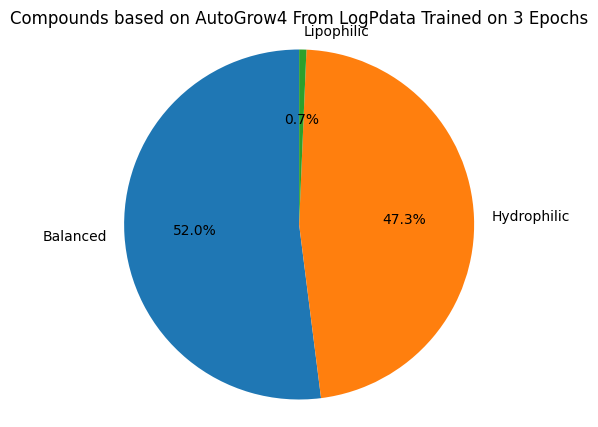

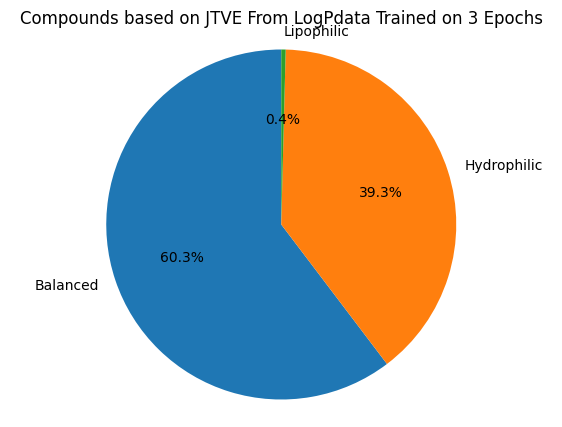

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Data for the first set
data_1 = {
    'Balanced': 78,
    'Hydrophilic': 71,
    'Lipophilic': 1
}

# Data for the second set
data_2 = {
    'Balanced': 149,
    'Hydrophilic': 97,
    'Lipophilic': 1
}

# Creating DataFrames
df_1 = pd.Series(data_1).reset_index(name='count').rename(columns={'index': 'category'})
df_2 = pd.Series(data_2).reset_index(name='count').rename(columns={'index': 'category'})

# Function to plot pie chart
def plot_pie_chart(df, chart_title):
    plt.figure(figsize=(7, 5))
    plt.pie(df['count'], labels=df['category'], autopct='%1.1f%%', startangle=90)
    plt.title(chart_title)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

# Plotting pie charts for each data set
plot_pie_chart(df_1, 'Compounds based on AutoGrow4 From LogPdata Trained on 3 Epochs')
plot_pie_chart(df_2, 'Compounds based on JTVE From LogPdata Trained on 3 Epochs')


Mutation large

In [ ]:
import pandas as pd

# Load the CSV file into a DataFrame
df1 = pd.read_csv('/content/data_all_generations (6).csv')

# Display the first few rows of the DataFrame
print(df1.head())


# Load the CSV file into a DataFrame
df2 = pd.read_csv('/content/data_all_generations (9).csv')

# Display the first few rows of the DataFrame
print(df2.head())

FileNotFoundError: [Errno 2] No such file or directory: '/content/data_all_generations (6).csv'

In [ ]:
import numpy as np
# Define the conditions for categorization
conditions = [
    (df1['fitness'] > 3),        # Lipophilic
    (df1['fitness'] >= 0) & (df1['fitness'] <= 3),  # Balanced
    (df1['fitness'] < 0)         # Hydrophilic
]

# Corresponding labels for each condition
labels = ['Lipophilic', 'Balanced', 'Hydrophilic']

# Apply the conditions and labels
df1['category'] = np.select(conditions, labels, default='Unknown')

# Count the occurrences of each category
category_counts = df1['category'].value_counts()

# Print the counts
print(category_counts)

per_counts = df1['category'].value_counts(normalize=True) * 100
print(per_counts)

category
Balanced       89
Hydrophilic    61
Name: count, dtype: int64
category
Balanced       59.333333
Hydrophilic    40.666667
Name: proportion, dtype: float64


In [ ]:
import numpy as np
# Define the conditions for categorization
conditions = [
    (df2['fitness'] > 3),        # Lipophilic
    (df2['fitness'] >= 0) & (df2['fitness'] <= 3),  # Balanced
    (df2['fitness'] < 0)         # Hydrophilic
]

# Corresponding labels for each condition
labels = ['Lipophilic', 'Balanced', 'Hydrophilic']

# Apply the conditions and labels
df2['category'] = np.select(conditions, labels, default='Unknown')

# Count the occurrences of each category
category_counts = df2['category'].value_counts()

# Print the counts
print(category_counts)

per_counts = df2['category'].value_counts(normalize=True) * 100
print(per_counts)

category
Balanced       33
Hydrophilic    17
Name: count, dtype: int64
category
Balanced       66.0
Hydrophilic    34.0
Name: proportion, dtype: float64


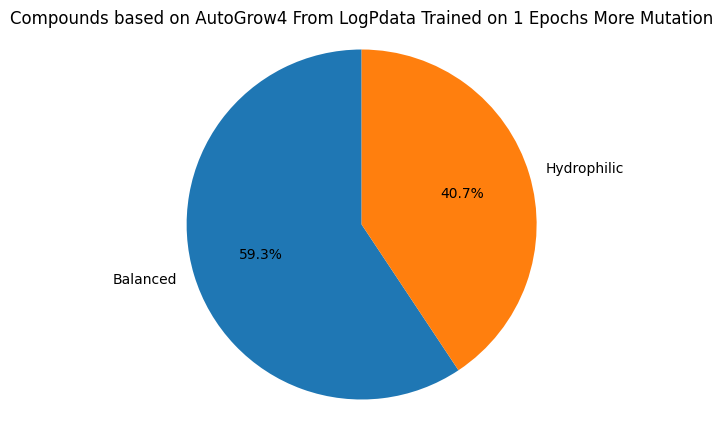

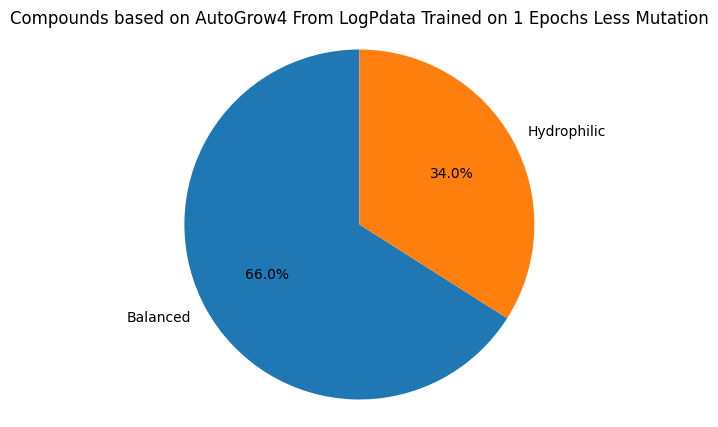

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Data for the first set
data_1 = {
    'Balanced': 59.333,
    'Hydrophilic': 40.667,
}

# Data for the second set
data_2 = {
    'Balanced': 66,
    'Hydrophilic': 34}

# Creating DataFrames
df_1 = pd.Series(data_1).reset_index(name='count').rename(columns={'index': 'category'})
df_2 = pd.Series(data_2).reset_index(name='count').rename(columns={'index': 'category'})

# Function to plot pie chart
def plot_pie_chart(df, chart_title):
    plt.figure(figsize=(7, 5))
    plt.pie(df['count'], labels=df['category'], autopct='%1.1f%%', startangle=90)
    plt.title(chart_title)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

# Plotting pie charts for each data set
plot_pie_chart(df_1, 'Compounds based on AutoGrow4 From LogPdata Trained on 1 Epochs More Mutation')
plot_pie_chart(df_2, 'Compounds based on JT-VAE From LogPdata Trained on 1 Epochs Less Mutation')


category
Balanced       25
Hydrophilic    24
Lipophilic      1
Name: count, dtype: int64
category
Balanced       59.333333
Hydrophilic    40.666667
Name: proportion, dtype: float64


In [ ]:
 df1['source'].value_counts()

source
mutation     68
crossover    66
initial      16
Name: count, dtype: int64

In [ ]:
 df2['source'].value_counts()

source
mutation     20
crossover    20
initial      10
Name: count, dtype: int64

In [ ]:
import pandas as pd

# Load the CSV file into a DataFrame
df1 = pd.read_csv('/content/data_all_generations (12).csv')

# Display the first few rows of the DataFrame
print(df1.head())

# Load the CSV file into a DataFrame
df2 = pd.read_csv('/content/data_all_generations (13).csv')

# Display the first few rows of the DataFrame
print(df2.head())

                                              smiles  parent1_id  reaction_id  \
0  CN(Cc1ccccc1Cl)C(=O)c1ccc(N(C(=O)OC(C)(C)C)C(=...        43.0         26.0   
1  COC(=O)c1[nH]c(C)cc1NC(=S)N1CC(Oc2ccc(C)cc2)C(...        27.0         32.0   
2     C[C@H]1C=CC[C@@H](C)N1c1ccc(C(=O)NCc2ccco2)cn1        14.0         90.0   
3  Cc1c(C(=O)N2CCCC2)cccc1N(C(=O)c1cccc2cc[nH]c12...        28.0         13.0   
4                     C[C@H]1SC(C(F)(F)F)NC1C(F)(F)F        15.0         43.0   

            zinc_id    source generation  parent2_id  compound_id   fitness  
0  ZINC000104147066  mutation        [1]         NaN         50.0 -0.230076  
1  ZINC000057352374  mutation        [1]         NaN         51.0  0.508508  
2  ZINC000033802586  mutation        [1]         NaN         52.0 -0.901463  
3  ZINC000001558054  mutation        [1]         NaN         53.0 -0.333770  
4  ZINC000002560294  mutation        [1]         NaN         54.0 -3.015528  
                                             

In [ ]:
# Define the conditions for categorization
conditions = [
    (df1['fitness'] > 3),        # Lipophilic
    (df1['fitness'] >= 0) & (df1['fitness'] <= 3),  # Balanced
    (df1['fitness'] < 0)         # Hydrophilic
]

# Corresponding labels for each condition
labels = ['Lipophilic', 'Balanced', 'Hydrophilic']

# Apply the conditions and labels
df1['category'] = np.select(conditions, labels, default='Unknown')

# Count the occurrences of each category
category_counts = df1['category'].value_counts()

# Print the counts
print(category_counts)

per_counts = df1['category'].value_counts(normalize=True) * 100
print(per_counts)

category
Balanced       29
Hydrophilic    21
Name: count, dtype: int64
category
Balanced       58.0
Hydrophilic    42.0
Name: proportion, dtype: float64


In [ ]:
# Define the conditions for categorization
conditions = [
    (df2['fitness'] > 3),        # Lipophilic
    (df2['fitness'] >= 0) & (df2['fitness'] <= 3),  # Balanced
    (df2['fitness'] < 0)         # Hydrophilic
]

# Corresponding labels for each condition
labels = ['Lipophilic', 'Balanced', 'Hydrophilic']

# Apply the conditions and labels
df2['category'] = np.select(conditions, labels, default='Unknown')

# Count the occurrences of each category
category_counts = df2['category'].value_counts()

# Print the counts
print(category_counts)

per_counts = df2['category'].value_counts(normalize=True) * 100
print(per_counts)

category
Balanced       27
Hydrophilic    23
Name: count, dtype: int64
category
Balanced       54.0
Hydrophilic    46.0
Name: proportion, dtype: float64


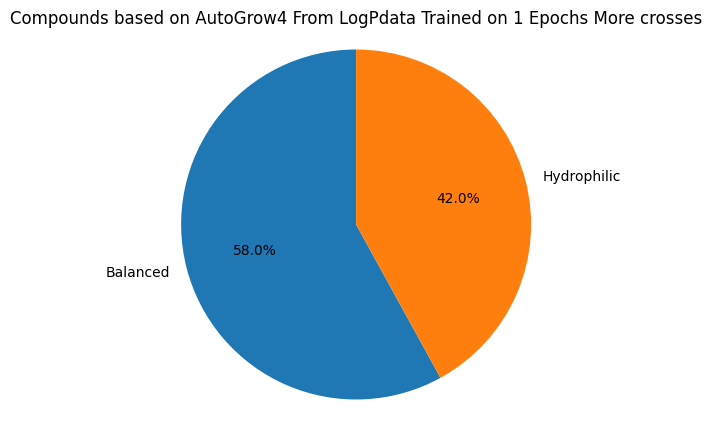

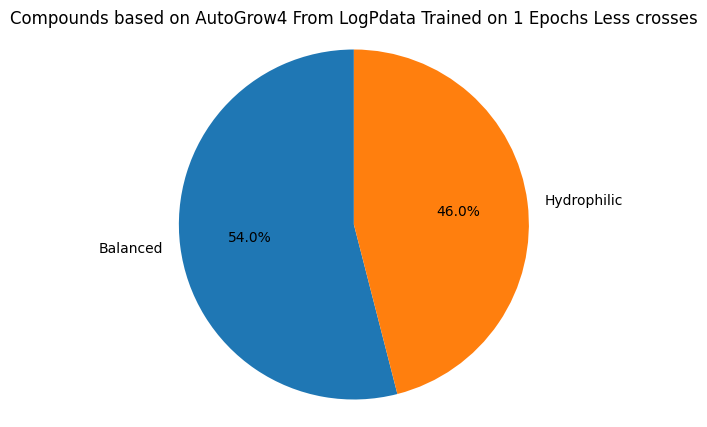

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Data for the first set
data_1 = {
    'Balanced': 29,
    'Hydrophilic': 21,
}

# Data for the second set
data_2 = {
    'Balanced': 27,
    'Hydrophilic': 23}

# Creating DataFrames
df_1 = pd.Series(data_1).reset_index(name='count').rename(columns={'index': 'category'})
df_2 = pd.Series(data_2).reset_index(name='count').rename(columns={'index': 'category'})

# Function to plot pie chart
def plot_pie_chart(df, chart_title):
    plt.figure(figsize=(7, 5))
    plt.pie(df['count'], labels=df['category'], autopct='%1.1f%%', startangle=90)
    plt.title(chart_title)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

# Plotting pie charts for each data set
plot_pie_chart(df_1, 'Compounds based on AutoGrow4 From LogPdata Trained on 1 Epochs More crosses')
plot_pie_chart(df_2, 'Compounds based on JT-VAE From LogPdata Trained on 1 Epochs Less crosses')


In [ ]:
 df1['source'].value_counts()

source
mutation     20
crossover    20
initial      10
Name: count, dtype: int64

In [ ]:
 df2['source'].value_counts()

source
mutation     20
crossover    20
initial      10
Name: count, dtype: int64

Zinc

In [ ]:
df1 = pd.read_csv('/content/data_all_generations (14).csv')

# Display the first few rows of the DataFrame
print(df1.head())

                                              smiles  parent1_id  reaction_id  \
0  CC[C@@H](NC(=O)c1cc(-c2ccncc2)nc2ccc(OC3CC(C(N...        42.0         19.0   
1                                  CCCCC[C@H](C#N)CC        28.0         21.0   
2             CCCCC(=O)N(C(=O)CCl)c1ccc(C(=O)NCC)cc1        16.0         26.0   
3  CCc1nc(-c2cc(NC(=O)c3cccc(-c4cc(O)ccc4C=O)c3)c...         6.0         79.0   
4  O=C(NC[C@@H]1CC=CCC1)N1CCN(CCn2ccc(-c3ccccc3)n...        22.0         31.0   

            zinc_id    source generation  parent2_id  compound_id   fitness  
0  ZINC000096528042  mutation        [1]         NaN         50.0  0.565159  
1               NaN  mutation        [1]         NaN         51.0 -0.560981  
2  ZINC000059696906  mutation        [1]         NaN         52.0  0.256691  
3  ZINC000038220999  mutation        [1]         NaN         53.0  1.250350  
4  ZINC000062822194  mutation        [1]         NaN         54.0 -0.866021  


In [ ]:
# Define the conditions for categorization
conditions = [
    (df1['fitness'] > 3),        # Lipophilic
    (df1['fitness'] >= 0) & (df1['fitness'] <= 3),  # Balanced
    (df1['fitness'] < 0)         # Hydrophilic
]

# Corresponding labels for each condition
labels = ['Lipophilic', 'Balanced', 'Hydrophilic']

# Apply the conditions and labels
df1['category'] = np.select(conditions, labels, default='Unknown')

# Count the occurrences of each category
category_counts = df1['category'].value_counts()

# Print the counts
print(category_counts)

per_counts = df1['category'].value_counts(normalize=True) * 100
print(per_counts)

category
Balanced       29
Hydrophilic    21
Name: count, dtype: int64
category
Balanced       58.0
Hydrophilic    42.0
Name: proportion, dtype: float64


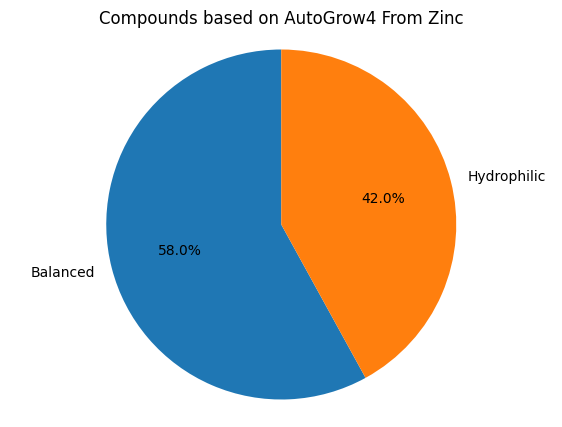

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Data for the first set
data_1 = {
    'Balanced': 29,
    'Hydrophilic': 21,
}

# Creating DataFrames
df_1 = pd.Series(data_1).reset_index(name='count').rename(columns={'index': 'category'})

# Function to plot pie chart
def plot_pie_chart(df, chart_title):
    plt.figure(figsize=(7, 5))
    plt.pie(df['count'], labels=df['category'], autopct='%1.1f%%', startangle=90)
    plt.title(chart_title)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

# Plotting pie charts for each data set
plot_pie_chart(df_1, 'Compounds based on AutoGrow4 From Zinc')


In [ ]:
import pandas as pd

# Load the CSV file into a DataFrame
df1 = pd.read_csv('/content/data_all_generations (15).csv')

# Display the first few rows of the DataFrame
print(df1.head())

# Load the CSV file into a DataFrame
df2 = pd.read_csv('/content/data_all_generations (16).csv')

# Display the first few rows of the DataFrame
print(df2.head())

                                              smiles  parent1_id  reaction_id  \
0  Cc1cc(C)n(-c2ccc(N(C(=O)c3ccc(SC(F)F)cc3)C(=S)...        17.0         32.0   
1  CCCCOC(=O)N(CCC)C(=O)C1(c2ccc(NC(=O)c3ccc(C)cc...         4.0         12.0   
2  CCn1c(C)cc(C(=CC(=O)N2CCC[C@H](N)C2)CSc2nc3scc...        26.0         86.0   
3  O=C(Nc1ccc(N2CCCCC2)c(OC[C@H]2CCN2C2CC2)c1)c1c...        37.0         19.0   
4  C=C(C=CC=C(C)C=CC1=C(C)CCCC1(C)C)C=C(O)OC[C@H]...        14.0         65.0   

            zinc_id    source generation  parent2_id  compound_id   fitness  
0  ZINC000000167163  mutation        [1]         NaN         50.0  2.354852  
1  ZINC000001586736  mutation        [1]         NaN         51.0  1.885470  
2  ZINC000253567521  mutation        [1]         NaN         52.0 -0.266595  
3  ZINC000211644647  mutation        [1]         NaN         53.0 -0.381458  
4  ZINC001204604266  mutation        [1]         NaN         54.0  0.292430  
   compound_id                               

In [ ]:
# Define the conditions for categorization
conditions = [
    (df1['fitness'] > 3),        # Lipophilic
    (df1['fitness'] >= 0) & (df1['fitness'] <= 3),  # Balanced
    (df1['fitness'] < 0)         # Hydrophilic
]

# Corresponding labels for each condition
labels = ['Lipophilic', 'Balanced', 'Hydrophilic']

# Apply the conditions and labels
df1['category'] = np.select(conditions, labels, default='Unknown')

# Count the occurrences of each category
category_counts = df1['category'].value_counts()

# Print the counts
print(category_counts)

per_counts = df1['category'].value_counts(normalize=True) * 100
print(per_counts)

category
Balanced       28
Hydrophilic    22
Name: count, dtype: int64
category
Balanced       56.0
Hydrophilic    44.0
Name: proportion, dtype: float64


In [ ]:
# Define the conditions for categorization
conditions = [
    (df2['fitness'] > 3),        # Lipophilic
    (df2['fitness'] >= 0) & (df2['fitness'] <= 3),  # Balanced
    (df2['fitness'] < 0)         # Hydrophilic
]

# Corresponding labels for each condition
labels = ['Lipophilic', 'Balanced', 'Hydrophilic']

# Apply the conditions and labels
df2['category'] = np.select(conditions, labels, default='Unknown')

# Count the occurrences of each category
category_counts = df2['category'].value_counts()

# Print the counts
print(category_counts)

per_counts = df2['category'].value_counts(normalize=True) * 100
print(per_counts)

category
Balanced       43
Hydrophilic    27
Name: count, dtype: int64
category
Balanced       61.428571
Hydrophilic    38.571429
Name: proportion, dtype: float64


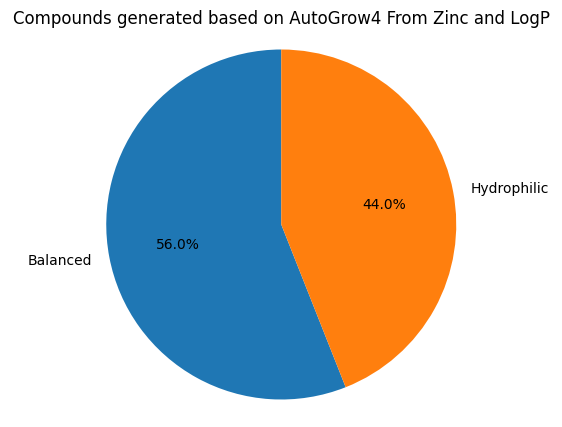

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Data for the first set
data_1 = {
    'Balanced': 28,
    'Hydrophilic': 22,
}

# Creating DataFrames
df_1 = pd.Series(data_1).reset_index(name='count').rename(columns={'index': 'category'})

# Function to plot pie chart
def plot_pie_chart(df, chart_title):
    plt.figure(figsize=(7, 5))
    plt.pie(df['count'], labels=df['category'], autopct='%1.1f%%', startangle=90)
    plt.title(chart_title)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

# Plotting pie charts for each data set
plot_pie_chart(df_1, 'Compounds generated based on AutoGrow4 From Zinc and LogP')


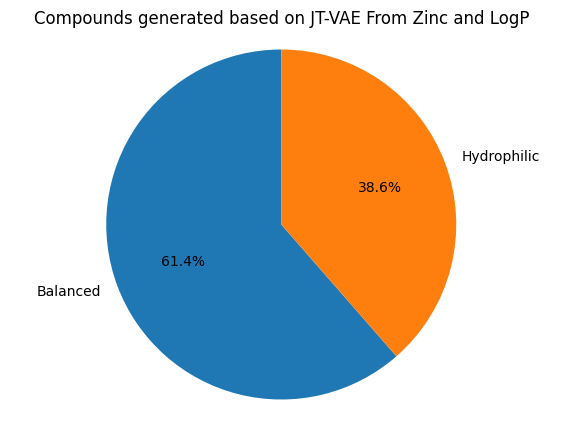

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Data for the first set
data_1 = {
    'Balanced': 43,
    'Hydrophilic': 27,
}

# Creating DataFrames
df_1 = pd.Series(data_1).reset_index(name='count').rename(columns={'index': 'category'})

# Function to plot pie chart
def plot_pie_chart(df, chart_title):
    plt.figure(figsize=(7, 5))
    plt.pie(df['count'], labels=df['category'], autopct='%1.1f%%', startangle=90)
    plt.title(chart_title)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

# Plotting pie charts for each data set
plot_pie_chart(df_1, 'Compounds generated based on JT-VAE From Zinc and LogP')


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df1 = pd.read_csv('/content/data_all_generations (23).csv')

# Display the first few rows of the DataFrame
print(df1.head())


# Load the CSV file into a DataFrame
df2 = pd.read_csv('/content/data_all_generations (25).csv')

# Display the first few rows of the DataFrame
print(df2.head())


# Load the CSV file into a DataFrame
df3 = pd.read_csv('/content/data_all_generations (22).csv')

# Display the first few rows of the DataFrame
print(df3.head())

                                              smiles  parent1_id  reaction_id  \
0  COc1ccc(-c2nc3ccccc3[nH]2)cc1NC(=O)c1ccc(F)c(F...         1.0          NaN   
1       COc1ccc(-c2nc3ccccc3[nH]2)cc1NC(=O)c1ccccc1F         5.0          NaN   
2      COc1cccc(-c2cc(CCc3ccccc3)c(C#N)c(=O)[nH]2)c1        18.0          NaN   
3        C=CCNC(=O)Cc1cc(N)cc(C)c1NC(=O)c1cccc(Cl)c1        10.0          NaN   
4  COc1cc([C@@H]2C(C(=O)Nc3ccc(F)c(C(C)=O)c3)=C(C...        14.0          NaN   

   zinc_id     source generation  parent2_id  compound_id   fitness  
0      NaN  crossover        [1]        41.0         50.0  2.058218  
1      NaN  crossover        [1]         1.0         51.0  2.214261  
2      NaN  crossover        [1]         5.0         52.0  1.001716  
3      NaN  crossover        [1]        44.0         53.0  0.511400  
4      NaN  crossover        [1]        40.0         54.0 -0.522289  
                                              smiles  parent1_id  reaction_id  \
0  Cc1ccccc1

In [ ]:
# Define the conditions for categorization
conditions = [
    (df1['fitness'] > 3),        # Lipophilic
    (df1['fitness'] >= 0) & (df1['fitness'] <= 3),  # Balanced
    (df1['fitness'] < 0)         # Hydrophilic
]

# Corresponding labels for each condition
labels = ['Lipophilic', 'Balanced', 'Hydrophilic']

# Apply the conditions and labels
df1['category'] = np.select(conditions, labels, default='Unknown')

# Count the occurrences of each category
category_counts = df1['category'].value_counts()

# Print the counts
print(category_counts)

per_counts = df1['category'].value_counts(normalize=True) * 100
print(per_counts)

category
Balanced       27
Hydrophilic    23
Name: count, dtype: int64
category
Balanced       54.0
Hydrophilic    46.0
Name: proportion, dtype: float64


In [ ]:
# Define the conditions for categorization
conditions = [
    (df2['fitness'] > 3),        # Lipophilic
    (df2['fitness'] >= 0) & (df2['fitness'] <= 3),  # Balanced
    (df2['fitness'] < 0)         # Hydrophilic
]

# Corresponding labels for each condition
labels = ['Lipophilic', 'Balanced', 'Hydrophilic']

# Apply the conditions and labels
df2['category'] = np.select(conditions, labels, default='Unknown')

# Count the occurrences of each category
category_counts = df2['category'].value_counts()

# Print the counts
print(category_counts)

per_counts = df2['category'].value_counts(normalize=True) * 100
print(per_counts)

category
Balanced       33
Hydrophilic    32
Name: count, dtype: int64
category
Balanced       50.769231
Hydrophilic    49.230769
Name: proportion, dtype: float64


In [ ]:
df1['smiles']

0     COC(=O)[C@H](NC(=S)N(C(=O)CN(c1ccccc1C)S(=O)(=...
1     CC[C@H](O)[C@@H](C)C(=O)N(C(=O)NCC(=O)NCc1cccc...
2     CCOc1ccc(NC(=O)CSc2nnc(-c3ccc(NCc4nnnn4C)cc3)o...
3     COCC(=O)N(C(=O)[C@]1(C)Sc2ccccc2NC1=O)c1c(C(=O...
4     COc1cc(C=C2C(=O)N(C(=O)[C@H]3CNC[C@H]3C)C(=O)N...
5        CCOc1ccc(N(Cc2ccccc2Cl)C(=O)NCCCCCCCC(=O)O)cn1
6     COCCn1c(C(=O)N2CCO[C@@H](c3ccccc3)C2)cc2cc(O[C...
7     COC(=O)[C@@H](NC(=O)N1C(=N)SC(=Cc2ccc(OC)c(OCc...
8     CCN(CC(=O)N(C(=S)NCC(C)(C)CN(C)C)c1ccccc1C(F)(...
9     CCn1c(SCC(=O)N[C@H](C)c2ccccc2/C=C/c2ccc(COC3C...
10    COC(=O)N(C=O)c1ccccc1C1=CCN(CCS(=O)(=O)c2ccc(C...
11    Cc1n[nH]c(-c2cccc(CN(C(=O)c3c[nH]c(C#N)c3)c3cc...
12    CC(=CC(=O)N1C[C@@H](C)C[C@@H]1C)c1ccc(SCC(=O)N...
13    CCC(=O)N1CCC(N(C(=O)Nc2cc(C)cc(C)c2)[C@@H](c2c...
14    CC[C@H](C)N1CC(C(C)(O)c2cccc(NC(=O)[C@H](C)N3C...
15    CCCOC(=O)c1c(N(C(=O)O[C@@H]2CS(=O)(=O)C[C@@H]2...
16    Cc1ccc(S(=O)(=O)NC2CC2)cc1C(=O)N(C(=O)N[C@@H]1...
17         CCC(CC)C1=CC(N2C[C@@H]3C[C@H]2CS3)CC(

In [ ]:
from FNLGMD.source.scorers.SAScore import sascorer
from FNLGMD.source.scorers.base_scorer import Scorer
from rdkit.Chem import MolFromSmiles, MolToSmiles, Descriptors, rdmolops
import networkx as nx

def score(population):

    smiles = population['smiles']
    smiles_rdkit = []
    for s in smiles:
        mol = MolFromSmiles(s)
        smi = MolToSmiles(mol,isomericSmiles=False)
        smiles_rdkit.append(smi)

    logP_values = []
    for i in range(len(smiles_rdkit)):
        logP_values.append(Descriptors.MolLogP(MolFromSmiles(smiles_rdkit[ i ])))

    SA_scores = []
    for i in range(len(smiles_rdkit)):
        SA_scores.append(-sascorer.calculateScore(MolFromSmiles(smiles_rdkit[ i ])))

    cycle_scores = []

    for i in range(len(smiles_rdkit)):
        cycle_list = nx.cycle_basis(nx.Graph(rdmolops.GetAdjacencyMatrix(MolFromSmiles(smiles_rdkit[ i ]))))

        if len(cycle_list) == 0:
            cycle_length = 0
        else:
            cycle_length = max([ len(j) for j in cycle_list ])
        if cycle_length <= 6:
            cycle_length = 0
        else:
            cycle_length = cycle_length - 6
        cycle_scores.append(-cycle_length)

    SA_scores_normalized = (np.array(SA_scores) - np.mean(SA_scores)) / np.std(SA_scores)
    logP_values_normalized = (np.array(logP_values) - np.mean(logP_values)) / np.std(logP_values)
    cycle_scores_normalized = (np.array(cycle_scores) - np.mean(cycle_scores)) / np.std(cycle_scores)

    SA_scores_normalized[np.isnan(SA_scores_normalized)] = 0.0
    logP_values_normalized[np.isnan(logP_values_normalized)] = 0.0
    cycle_scores_normalized[np.isnan(cycle_scores_normalized)] = 0.0

    targets = SA_scores_normalized + logP_values_normalized + cycle_scores_normalized
    population['fitness'] = targets

    return logP_values, SA_scores, cycle_scores, targets

ModuleNotFoundError: No module named 'FNLGMD'

In [ ]:
# Define the conditions for categorization
conditions = [
    (df3['fitness'] > 3),        # Lipophilic
    (df3['fitness'] >= 0) & (df3['fitness'] <= 3),  # Balanced
    (df3['fitness'] < 0)         # Hydrophilic
]

# Corresponding labels for each condition
labels = ['Lipophilic', 'Balanced', 'Hydrophilic']

# Apply the conditions and labels
df3['category'] = np.select(conditions, labels, default='Unknown')

# Count the occurrences of each category
category_counts = df3['category'].value_counts()

# Print the counts
print(category_counts)

per_counts = df3['category'].value_counts(normalize=True) * 100
print(per_counts)

category
Balanced       27
Hydrophilic    21
Lipophilic      2
Name: count, dtype: int64
category
Balanced       54.0
Hydrophilic    42.0
Lipophilic      4.0
Name: proportion, dtype: float64


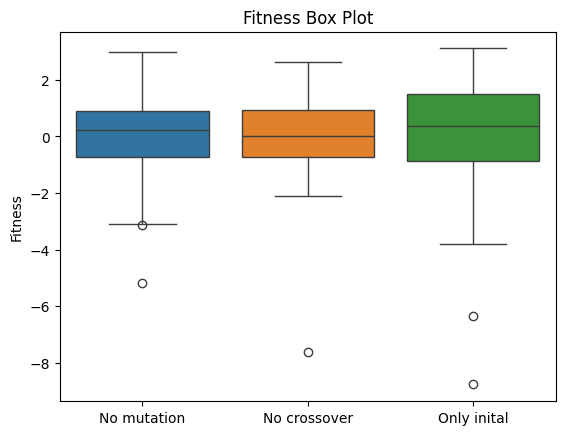

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df1, df2, and df3 are your dataframes and they all contain a 'fitness' column
# Create a new dataframe for plotting
data = pd.concat([df1['fitness'], df2['fitness'], df3['fitness']], axis=1)
data.columns = ['No mutation', 'No crossover', 'Only inital']

# Create a boxplot
sns.boxplot(data=data)
plt.title('Fitness Box Plot')
plt.ylabel('Fitness')
plt.show()


In [ ]:
df1 = pd.read_csv('/content/data_all_generations (26).csv')

# Display the first few rows of the DataFrame
print(df1.head())

                                              smiles  parent1_id  reaction_id  \
0  CCCC(C)(C)Oc1ccc(OC)c(S(=O)(=O)N[C@H](c2ccccc2...         4.0         19.0   
1  COC[C@@H](C)OC(=O)c1ccccc1-c1nc2ccc(OC)cc2cc1C...        36.0         89.0   
2  COCc1cccc(N(C(=S)NC2=CCS(=O)(=O)C2)[C@@H](C)C(...         5.0         94.0   
3         Cc1ccc(C2OC2CC(=O)NCc2ccc(Cn3cncn3)cc2)cc1        46.0          3.0   
4     [N-]=[N+]=Nc1cc(-c2cccc(C(=O)NC3CC3)c2)ccc1C=O        39.0          6.0   

            zinc_id    source generation  parent2_id  compound_id   fitness  
0  ZINC000001648167  mutation     [1, 2]         NaN         50.0  1.607781  
1  ZINC001606798926  mutation  [1, 2, 3]         NaN         51.0  2.436105  
2  ZINC000002454917  mutation        [1]         NaN         52.0 -1.403251  
3               NaN  mutation        [1]         NaN         53.0 -1.011008  
4               NaN  mutation     [1, 2]         NaN         54.0  1.049021  


In [ ]:
unique_sources = df1['source'].unique()
print(unique_sources)


['mutation' 'crossover' 'initial']


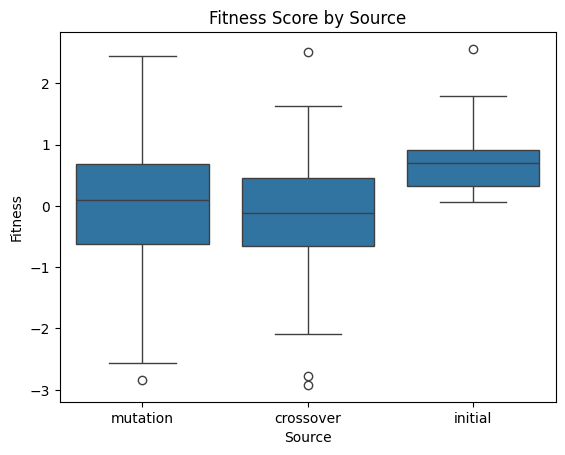

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame that contains the 'fitness' and 'source' columns
# Create a boxplot
sns.boxplot(x='source', y='fitness', data=df1)  # Ensure to use 'df' if that's your DataFrame's name
plt.title('Fitness Score by Source')
plt.ylabel('Fitness')
plt.xlabel('Source')
plt.show()


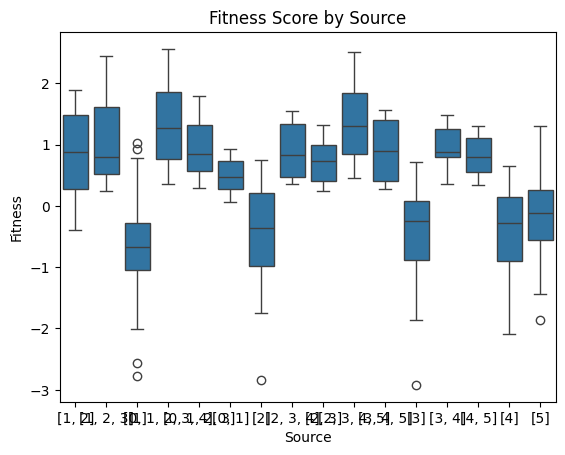

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame that contains the 'fitness' and 'source' columns
# Create a boxplot
sns.boxplot(x='generation', y='fitness', data=df1)  # Ensure to use 'df' if that's your DataFrame's name
plt.title('Fitness Score by Source')
plt.ylabel('Fitness')
plt.xlabel('Source')
plt.show()


In [ ]:
import pandas as pd

# Assuming 'df1' is your DataFrame and 'generations' column contains lists like [1, 2, 4]
# Extract the last integer element from each list in the 'generations' column
last_elements = df1['generation'].apply(lambda x: x[-1] if isinstance(x, list) and len(x) > 0 else None)

print(last_elements)


0      None
1      None
2      None
3      None
4      None
       ... 
245    None
246    None
247    None
248    None
249    None
Name: generation, Length: 250, dtype: object


In [ ]:
import pandas as pd

# Assuming 'df1' is your DataFrame and 'generations' column contains lists like [1, 2, 4]
# Extract the second to last integer element from each list in the 'generations' column
second_to_last_elements = df1['generation'].apply(lambda x: x[-2] if isinstance(x, list) and len(x) > 1 else None)

print(second_to_last_elements)


0      None
1      None
2      None
3      None
4      None
       ... 
245    None
246    None
247    None
248    None
249    None
Name: generation, Length: 250, dtype: object


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df_full = pd.read_csv('/content/data_all_generations (26)2.csv')

# Display the first few rows of the DataFrame
print(df_full.head())


# Load the CSV file into a DataFrame
df_bal = pd.read_csv('/content/data_all_generations bal.csv')

# Display the first few rows of the DataFrame
print(df_bal.head())


# Load the CSV file into a DataFrame
df_lipo = pd.read_csv('/content/data_all_generations lipo.csv')

# Display the first few rows of the DataFrame
print(df_lipo.head())


# Load the CSV file into a DataFrame
df_hydro = pd.read_csv('/content/data_all_generations hydro.csv')

# Display the first few rows of the DataFrame
print(df_hydro.head())

                                              smiles  parent1_id  reaction_id  \
0  CCCC(C)(C)Oc1ccc(OC)c(S(=O)(=O)N[C@H](c2ccccc2...         4.0         19.0   
1  COC[C@@H](C)OC(=O)c1ccccc1-c1nc2ccc(OC)cc2cc1C...        36.0         89.0   
2  COCc1cccc(N(C(=S)NC2=CCS(=O)(=O)C2)[C@@H](C)C(...         5.0         94.0   
3         Cc1ccc(C2OC2CC(=O)NCc2ccc(Cn3cncn3)cc2)cc1        46.0          3.0   
4     [N-]=[N+]=Nc1cc(-c2cccc(C(=O)NC3CC3)c2)ccc1C=O        39.0          6.0   

            zinc_id    source generation  parent2_id  compound_id   fitness  
0  ZINC000001648167  mutation     [1, 2]         NaN         50.0  1.607781  
1  ZINC001606798926  mutation  [1, 2, 3]         NaN         51.0  2.436105  
2  ZINC000002454917  mutation        [1]         NaN         52.0 -1.403251  
3               NaN  mutation        [1]         NaN         53.0 -1.011008  
4               NaN  mutation     [1, 2]         NaN         54.0  1.049021  
                                             

In [ ]:
df_hydro['Source'] = 'Hydrophilic'
df_lipo['Source'] = 'Lipophilic'
df_bal['Source'] = 'Balance'
df_full['Source'] = 'Full data'

# Concatenate the DataFrames horizontally
df_combined = pd.concat([df_full, df_bal, df_lipo, df_hydro], ignore_index=True)

# Display the first few rows of the combined DataFrame to verify


In [ ]:
df_combined

,smiles,parent1_id,reaction_id,zinc_id,source,generation,parent2_id,compound_id,fitness,Source
0,CCCC(C)(C)Oc1ccc(OC)c(S(=O)(=O)N[C@H](c2ccccc2...,4.0,19.0,ZINC000001648167,mutation,"[1, 2]",NaN,50.0,1.607781,Full data
1,COC[C@@H](C)OC(=O)c1ccccc1-c1nc2ccc(OC)cc2cc1C...,36.0,89.0,ZINC001606798926,mutation,"[1, 2, 3]",NaN,51.0,2.436105,Full data
2,COCc1cccc(N(C(=S)NC2=CCS(=O)(=O)C2)[C@@H](C)C(...,5.0,94.0,ZINC000002454917,mutation,[1],NaN,52.0,-1.403251,Full data
3,Cc1ccc(C2OC2CC(=O)NCc2ccc(Cn3cncn3)cc2)cc1,46.0,3.0,NaN,mutation,[1],NaN,53.0,-1.011008,Full data
4,[N-]=[N+]=Nc1cc(-c2cccc(C(=O)NC3CC3)c2)ccc1C=O,39.0,6.0,NaN,mutation,"[1, 2]",NaN,54.0,1.049021,Full data
...,...,...,...,...,...,...,...,...,...,...
995,CCCCCCCCCCCC(=O)OCC[C@@H](CS(=O)(=O)c1cc(C=CNC...,129.0,8.0,NaN,mutation,"[4, 5]",NaN,165.0,0.202234,Hydrophilic
996,CCCCCCCCCCCC(=O)OCC[C@@H](CS(=O)(=O)c1cc(F)c(C...,108.0,NaN,NaN,crossover,"[4, 5]",105.0,176.0,0.134999,Hydrophilic
997,CCC(CC)(C(=O)Nc1sccc1C(N)=O)N(Cc1cc(C(N)=O)ccc...,82.0,32.0,ZINC000000164795,mutation,"[3, 4, 5]",NaN,108.0,0.180881,Hydrophilic
998,CCCCCCCCCCCC(=O)OCC[C@@H](CS(=O)(=O)c1cccc(F)c...,103.0,31.0,ZINC000033373160,mutation,"[4, 5]",NaN,163.0,0.014122,Hydrophilic


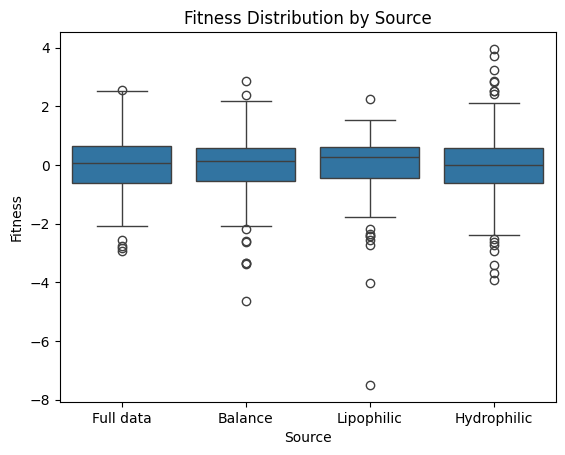

In [ ]:
import seaborn as sns

sns.boxplot(x='Source', y='fitness', data=df_combined)
plt.title('Fitness Distribution by Source')
plt.xlabel('Source')
plt.ylabel('Fitness')
plt.show()

In [ ]:
df_drug_info = pd.read_csv('/content/10_epochs_drug_info.csv')


In [ ]:
df_drug_info

,compound_id,smiles,generation,source,fitness,SA_score,LogP_score,Cycle_score
0,0,CC(c1cccc(NC(=O)N2CCCC2)c1)N1C(=O)C(=CC2CN(C)N...,"[0, 1]",initial,-1.718513,-0.582848,-1.135665,0.0
1,1,CC=C(CC)C(=O)N(Cc1ccccc1OC)C(=S)N(Cc1ccc(Cn2cn...,"[0, 1]",initial,0.246231,0.245398,0.000833,0.0
2,2,CCCC(C)(C)Oc1ccc(OC)c(S(=O)(=O)NC(c2ccc(-n3c(S...,"[0, 1]",initial,-0.120365,-2.762588,2.642224,0.0
3,3,CC[C@H](C)NCCCSC(=O)c1ccc(-c2ccc(OC(=O)N3CNCN3...,"[0, 1]",initial,0.025496,-0.913579,0.939074,0.0
4,4,CC[C@@H](C)CC(=O)NC[C@H]1Cc2cccc(-c3ccncc3)c2O1,"[0, 1]",initial,-0.533658,0.510669,-1.044326,0.0
...,...,...,...,...,...,...,...,...
95,95,COc1cccc([C@H]2[C@H](N3C(=O)c4ccccc4C3=O)C(=O)...,"[0, 1]",initial,-0.342321,0.651488,-0.993809,0.0
96,96,CC[C@H](C)N(CCCSC(=O)c1ccccc1-c1nc2ccc(OC)cc2c...,"[0, 1]",initial,1.313944,-1.457617,2.771562,0.0
97,97,CC=C(CC)C(=O)N(Cc1ccccc1OC)C(=S)N(Cc1ccc(Cn2cn...,"[0, 1]",initial,-0.071951,-0.923546,0.851596,0.0
98,98,Cc1ccc(C=CCC(=O)NC(=O)c2ccc(Cn3cncn3)c(Cl)c2)cc1,"[0, 1]",initial,0.256068,1.285880,-1.029812,0.0
